In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
df = pd.read_csv(path)

X_train = np.array([df['x'], df['y']]).T
y_train = np.array(df['z'])

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2


<Axes: xlabel='y', ylabel='z'>

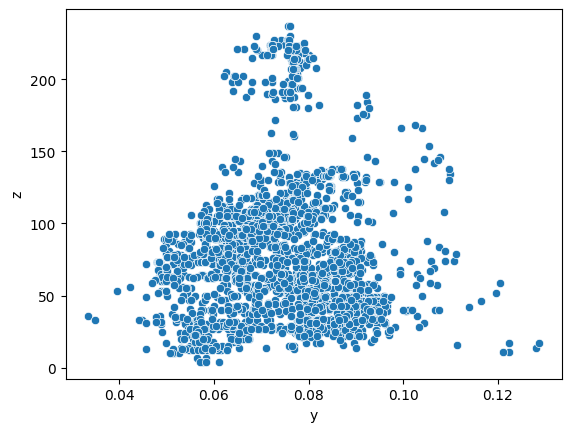

In [9]:
import seaborn as sns
# display the connection between x and z, y and z
sns.scatterplot(x=df['y'], y=df['z'])




In [10]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
rfr_mse, rfr_rmse, rfr_mae, rfr_r2 = evaluate_regression(y_test, y_pred)
print('[RFR]')
print('mse: ', rfr_mse)
print('rmse: ', rfr_rmse)
print('mae: ', rfr_mae)
print('r2: ', rfr_r2)

RFR_poly = RandomForestRegressor()
RFR_poly.fit(X_train_poly,y_train)
y_pred_poly = RFR_poly.predict(X_test_poly)
rfr_poly_mse, rfr_poly_rmse, rfr_poly_mae, rfr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[RFR_poly]')
print('mse: ', rfr_poly_mse)
print('rmse: ', rfr_poly_rmse)
print('mae: ', rfr_poly_mae)
print('r2: ', rfr_poly_r2)

[RFR]
mse:  1262.9310234521574
rmse:  35.53774083213728
mae:  22.95803001876173
r2:  0.42887813175788503
[RFR_poly]
mse:  1213.0889041275796
rmse:  34.829425836892284
mae:  23.03521575984991
r2:  0.4514177034187262


In [11]:
from sklearn.svm import SVR

Svr = SVR()
Svr.fit(X_train,y_train)
y_pred = Svr.predict(X_test)
svr_mse, svr_rmse, svr_mae, svr_r2 = evaluate_regression(y_test, y_pred)
print('[SVR]')
print('mse: ', svr_mse)
print('rmse: ', svr_rmse)
print('mae: ', svr_mae)
print('r2: ', svr_r2)

Svr_poly = SVR()
Svr_poly.fit(X_train_poly,y_train)
y_pred_poly = Svr_poly.predict(X_test_poly)
svr_poly_mse, svr_poly_rmse, svr_poly_mae, svr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[SVR_poly]')
print('mse: ', svr_poly_mse)
print('rmse: ', svr_poly_rmse)
print('mae: ', svr_poly_mae)
print('r2: ', svr_poly_r2)

[SVR]
mse:  2191.2964353556868
rmse:  46.811285341845576
mae:  34.80838935962001
r2:  0.009053312656994827
[SVR_poly]
mse:  2174.424847008745
rmse:  46.630728570426015
mae:  34.673873812715655
r2:  0.01668297166289867


In [12]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
lr_mse, lr_rmse, lr_mae, lr_r2 = evaluate_regression(y_test, y_pred)
print('[LR]')
print('mse: ', lr_mse)
print('rmse: ', lr_rmse)
print('mae: ', lr_mae)
print('r2: ', lr_r2)

LR_poly = LinearRegression()
LR_poly.fit(X_train_poly,y_train)
y_pred_poly = LR_poly.predict(X_test_poly)
lr_poly_mse, lr_poly_rmse, lr_poly_mae, lr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[LR_poly]')
print('mse: ', lr_poly_mse)
print('rmse: ', lr_poly_rmse)
print('mae: ', lr_poly_mae)
print('r2: ', lr_poly_r2)

[LR]
mse:  2174.251241054057
rmse:  46.6288670359259
mae:  35.99797619638518
r2:  0.01676147963786989
[LR_poly]
mse:  1726.8815315362922
rmse:  41.55576411926861
mae:  32.25055517185439
r2:  0.21907072658020466


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
# 'squared_error', 'huber', 'quantile', 'absolute_error'
GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
print('[GBR]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

GBR_poly = GradientBoostingRegressor()
GBR_poly.fit(X_train_poly,y_train)
y_pred_poly = GBR_poly.predict(X_test_poly)
gbr_poly_mse, gbr_poly_rmse, gbr_poly_mae, gbr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[GBR_poly]')
print('mse: ', gbr_poly_mse)
print('rmse: ', gbr_poly_rmse)
print('mae: ', gbr_poly_mae)
print('r2: ', gbr_poly_r2)

[GBR]
mse:  1161.894869313266
rmse:  34.08657902038962
mae:  25.727059229359952
r2:  0.47456863744684274
[GBR_poly]
mse:  1135.9661222143855
rmse:  33.70409651977613
mae:  24.95747811244924
r2:  0.4862941190521737


In [14]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor()
MLP.fit(X_train,y_train)
y_pred = MLP.predict(X_test)
mlp_mse, mlp_rmse, mlp_mae, mlp_r2 = evaluate_regression(y_test, y_pred)
print('[MLP]')
print('mse: ', mlp_mse)
print('rmse: ', mlp_rmse)
print('mae: ', mlp_mae)
print('r2: ', mlp_r2)

MLP_poly = MLPRegressor()
MLP_poly.fit(X_train_poly,y_train)
y_pred_poly = MLP_poly.predict(X_test_poly)
mlp_poly_mse, mlp_poly_rmse, mlp_poly_mae, mlp_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[MLP_poly]')
print('mse: ', mlp_poly_mse)
print('rmse: ', mlp_poly_rmse)
print('mae: ', mlp_poly_mae)
print('r2: ', mlp_poly_r2)

/home/ghosnp/miniconda3/envs/carla38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[MLP]
mse:  2281.4659420657617
rmse:  47.764693467725316
mae:  36.21038986142334
r2:  -0.031723084608123786
[MLP_poly]
mse:  2084.829019848821
rmse:  45.65992794397316
mae:  35.1429134152063
r2:  0.05719993992487271


/home/ghosnp/miniconda3/envs/carla38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


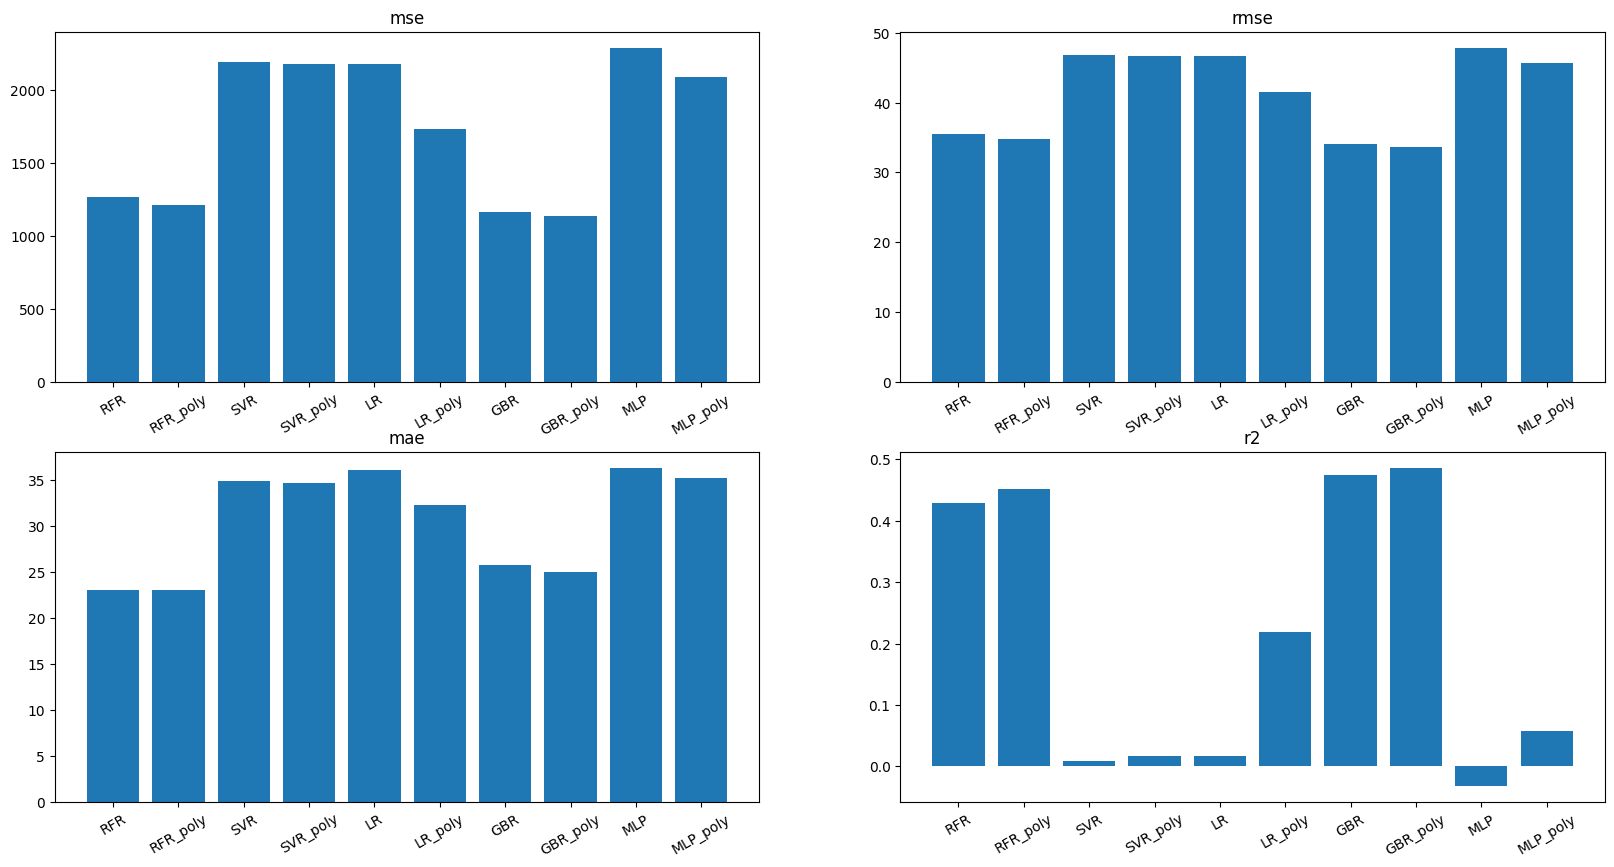

In [15]:
# visualize the metrics of each model
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['RFR', 'RFR_poly', 'SVR', 'SVR_poly', 'LR', 'LR_poly', 'GBR', 'GBR_poly', 'MLP', 'MLP_poly']
mse = [rfr_mse, rfr_poly_mse, svr_mse, svr_poly_mse, lr_mse, lr_poly_mse, gbr_mse, gbr_poly_mse, mlp_mse, mlp_poly_mse]
rmse = [rfr_rmse, rfr_poly_rmse, svr_rmse, svr_poly_rmse, lr_rmse, lr_poly_rmse, gbr_rmse, gbr_poly_rmse, mlp_rmse, mlp_poly_rmse]
mae = [rfr_mae, rfr_poly_mae, svr_mae, svr_poly_mae, lr_mae, lr_poly_mae, gbr_mae, gbr_poly_mae, mlp_mae, mlp_poly_mae]
r2 = [rfr_r2, rfr_poly_r2, svr_r2, svr_poly_r2, lr_r2, lr_poly_r2, gbr_r2, gbr_poly_r2, mlp_r2, mlp_poly_r2]

# spilt them into use and not use poly
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.bar(model_names, mse)
plt.xticks(rotation=30)
plt.title('mse')
plt.subplot(2,2,2)
plt.bar(model_names, rmse)
plt.xticks(rotation=30)
plt.title('rmse')
plt.subplot(2,2,3)
plt.bar(model_names, mae)
plt.xticks(rotation=30)
plt.title('mae')
plt.subplot(2,2,4)
plt.bar(model_names, r2)
plt.xticks(rotation=30)
plt.title('r2')
plt.show()



[learning_curve] Training set sizes: [ 170  340  511  681  852 1022 1192 1363 1533 1704]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   12.2s


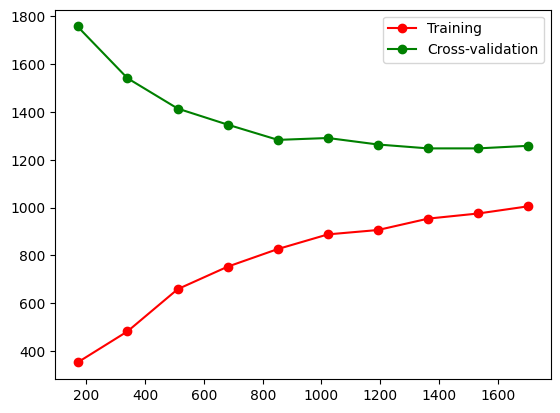

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   15.5s


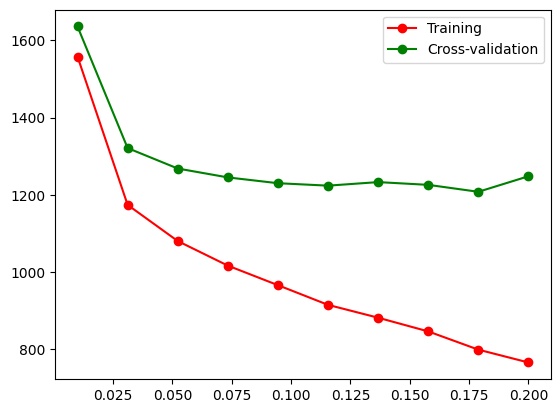

In [16]:
# therefore, we select GBR as the base model
from sklearn.ensemble import GradientBoostingRegressor
# draw the loss curve during training
from sklearn.model_selection import learning_curve

GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.08)
train_sizes, train_scores, test_scores = learning_curve(GBR, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1,1,10), verbose=1)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation')
plt.legend()
plt.show()

# draw the learning curve during training
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.01,0.2,10)
train_scores, test_scores = validation_curve(GBR, X_train, y_train, cv=5, param_name='learning_rate', param_range=param_range, scoring='neg_mean_squared_error', verbose=1)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training')

plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation')
plt.legend()
plt.show()

In [19]:
GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
print('[GBR]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

[GBR]
mse:  1090.9134719060266
rmse:  33.02897927435885
mae:  24.822745213337136
r2:  0.5066678000652788
